In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget
import math

def end_effector(theta_1, phi_1, theta_2, l_1=1, l_2=1):
    j1 = [l_1*np.cos(theta_1)*np.sin(phi_1), l_1*np.cos(theta_1)*np.cos(phi_1), l_1*np.sin(theta_1)]
    e1 = np.array([1,0,0])
    e2 = np.array([0,1,0])
    e1 = np.cross(j1, e1).reshape((3,1))
    e2 = np.cross(j1, e2).reshape((3,1))
    e = np.concatenate((e1, e2), axis=1)
    Q, R = np.linalg.qr(e)
    j2 = np.cos(theta_2)*Q[:,0] + np.sin(theta_2)*Q[:,1]
    return j1+l_2*j2
    
def robotic_arm_vel(t1_dot, t2_dot):
    return np.array([t1_dot, 0, t2_dot])

dt = 0.01
num_steps = 3000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
def flow(t1_dot, t2_dot):
    dt = 0.01
    num_steps = 125

    tps = np.empty((num_steps + 1, 3))  
    tps[0,:] = np.array([0,0,0]) 

    for i in range(num_steps):
        tps[i + 1] = tps[i] + robotic_arm_vel(t1_dot, t2_dot) * dt

    xyzs = np.empty((num_steps + 1, 4))  
    for i in range(num_steps+1):
        xyzs[i][0] = dt*i
        xyzs[i][1:] = end_effector(tps[i][0], tps[i][1], tps[i][2])

    xyz_coords = np.empty((num_steps+1, 3))
    for i in range(num_steps+1):
        xyz_coords[i] = xyzs[i][1:]
    return xyzs, xyz_coords


N = 49
sqrt_N = 7.00
xyzs = [0 for i in range(N)]
xyz_coords = [0 for i in range(N)]
for i in range(N):
    xyzs[i], xyz_coords[i] = flow(2*math.pi*int(i/sqrt_N)/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N)
list_traj = []
for i in range(len(xyzs)):
    for j in range(5):
        list_traj.append(xyzs[i][j*25:j*25+25,:2])
    #list_traj.append(xyzs[i][:,:2])
print(list_traj[0].shape)

(25, 2)


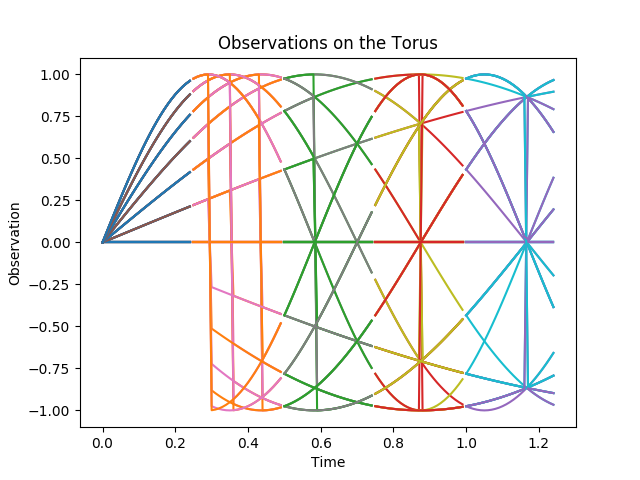

In [50]:
ax = plt.figure().add_subplot()
for i in range(0,len(list_traj)):
    ax.plot(*list_traj[i].T)
ax.set_title("Observations on the Torus")
plt.xlabel('Time')
plt.ylabel('Observation')
plt.show()

In [51]:
from traj2sim import *
traj_list = list_traj
t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(traj_list[:-2])
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='robo_arm.npy')
if load == True:
    t2s.load_bifilt(filename='robo_arm.npy')

|███████████████████████▎                | █▆▄ 17058/29403 [58%] in 12:18 ( 19/29403 [0%] in 1s (29.9/s, (31.2/s, 57/29403 [0%] in 2s (30.9/s, ▄▂▂ 129/29403 [0%] in 4s (30.2/s in 6s (30.6/s ▄▆█ 197/29403 [1%] in 6s (30.5/s▇▅▃ 262/29403 [1%] in 8s (31.2/s ▅▇▇ 302/29403 [1%] in 10s (31.4/ ▆█▆ 305/29403 [1%] in 10s (31.4/in 10s (31.3/405/29403 [1%] in 13s (32.0/in 14s (32.1/ ▅▇▇ 503/29403 [2%] in 16s (32.3/in 17s (32.4/ 663/29403 [2%] in 20s (32.5/▄▂▂ 688/29403 [2%] in 21s (32.6/ (32.6/ 829/29403 [3%] in 25s (32.7/(32.7/▆█▆ 916/29403 [3%] in 28s (32.7/▆▄▂ 932/29403 [3%] in 28s (32.7/935/29403 [3%] in 29s (32.7/▃▅▇ 958/29403 [3%] in 29s (32.8/in 30s (32.8/991/29403 [3%] in 30s (32.7/in 32s (32.81042/29403 [4%] in 32s (32.8in 33s (32.8 1110/29403 [4%] in 34s (32.8 ▆█▆ 1121/29403 [4%] in 34s (32.8 █▆▄ 1128/29403 [4%] in 34s (32.8(32.8 ▆▄▂ 1237/29403 [4%] in 38s (32.8 in 41s (33.01452/29403 [5%] in 44s (33.0 in 44s (33.0 █▆▄ 1481/29403 [5%] in 45s (33.0 ▁▃▅ 1579/29403 [5%] in 49s (32.5 in 52s

|████████████████████████████████████████| 29403/29403 [100%] in 21:29.6 (2 ▄▂▂ 17156/29403 [58%] in 12:22 ( 17226/29403 [59%] in 12:25 (█▆▄ 17256/29403 [59%] in 12:27 ( ▇▅▃ 17372/29403 [59%] in 12:32 ( (17427/29403 [59%] in 12:34 (in 12:36 ( 17554/29403 [60%] in 12:40 (17558/29403 [60%] in 12:40 ( ((( ▁▃▅ 17766/29403 [60%] in 12:50 ( 17809/29403 [61%] in 12:52 ( (in 12:53 (17888/29403 [61%] in 12:55 (( ▂▄▆ 18036/29403 [61%] in 13:02 ( 18045/29403 [61%] in 13:02 ( ▇▇▅ 18049/29403 [61%] in 13:02 (▇▇▅ 18086/29403 [62%] in 13:04 ( ▄▂▂ 18100/29403 [62%] in 13:04 (( ▃▅▇ 18188/29403 [62%] in 13:08 (18205/29403 [62%] in 13:09 ( 18221/29403 [62%] in 13:10 (( 18303/29403 [62%] in 13:14 (in 13:17 ( in 13:17 (in 13:20 ( 18480/29403 [63%] in 13:21 ((in 13:22 (█▆▄ 18517/29403 [63%] in 13:23 (18543/29403 [63%] in 13:24 ( 18558/29403 [63%] in 13:25 (▂▄▆ 18578/29403 [63%] in 13:26 (in 13:29 (18651/29403 [63%] in 13:29 ( 18714/29403 [64%] in 13:32 (▅▇▇ 18735/29403 [64%] in 13:33 ( ▇▇▅ 18741/29403 [64%]

/usr/local/lib/python3.6/dist-packages/persim/visuals.py:165: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim([x_down, x_up])
/usr/local/lib/python3.6/dist-packages/persim/visuals.py:166: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([y_down, y_up])


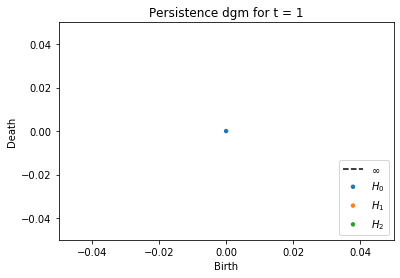

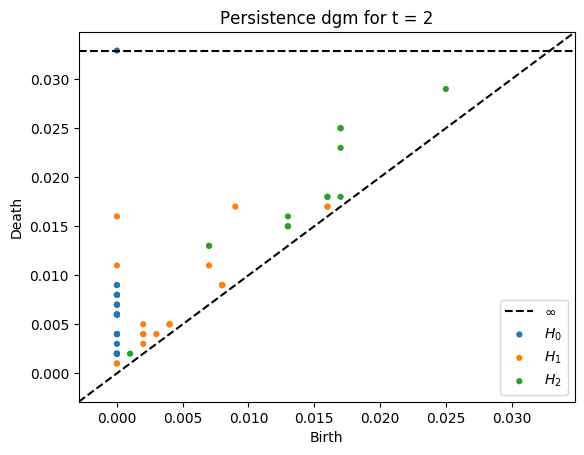

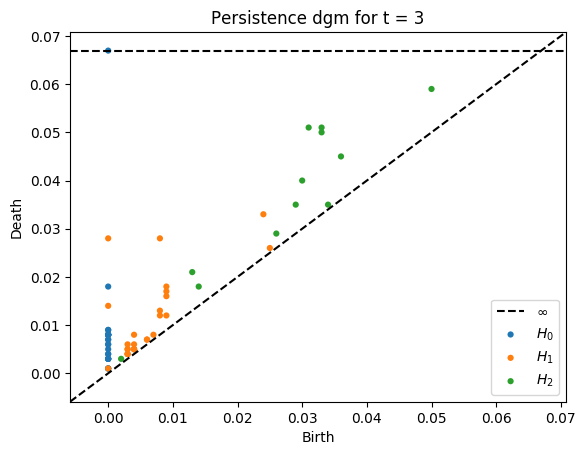

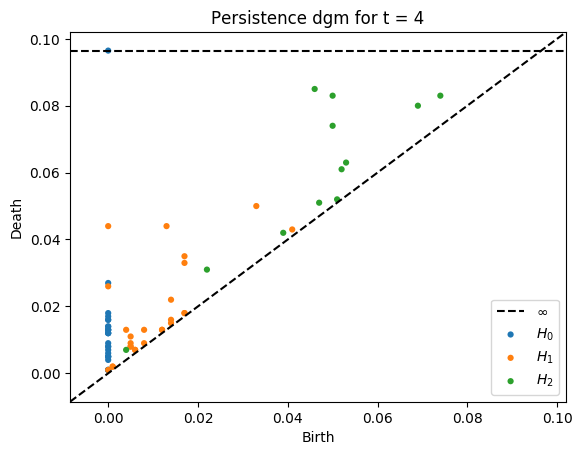

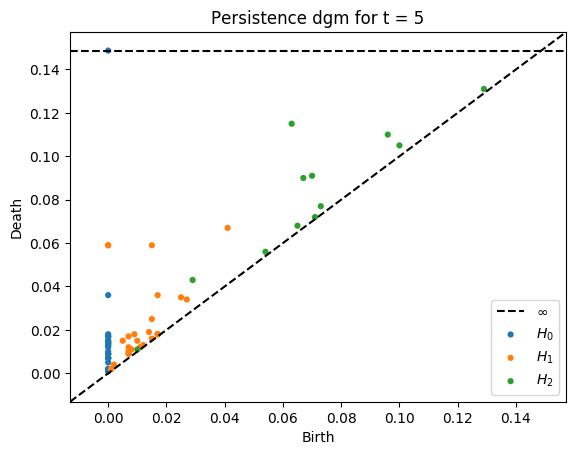

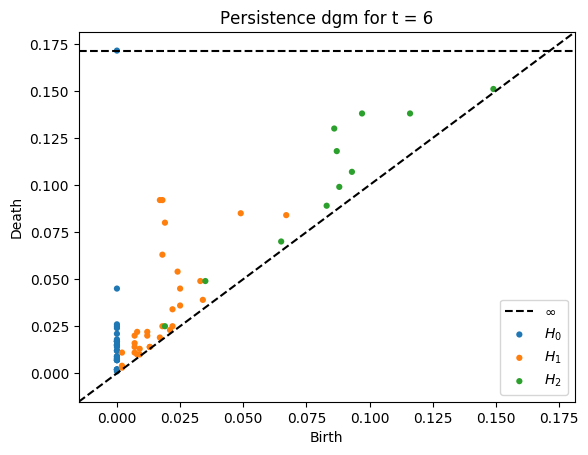

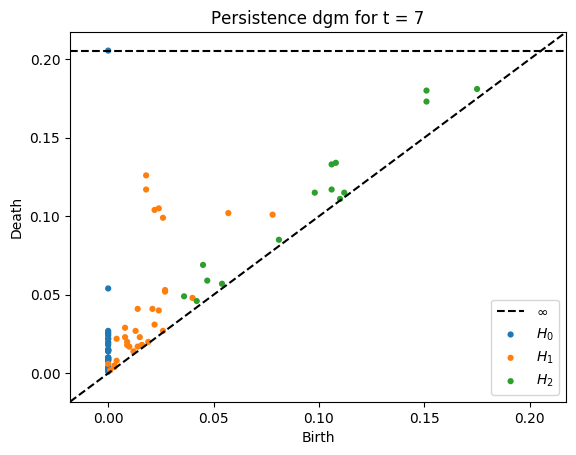

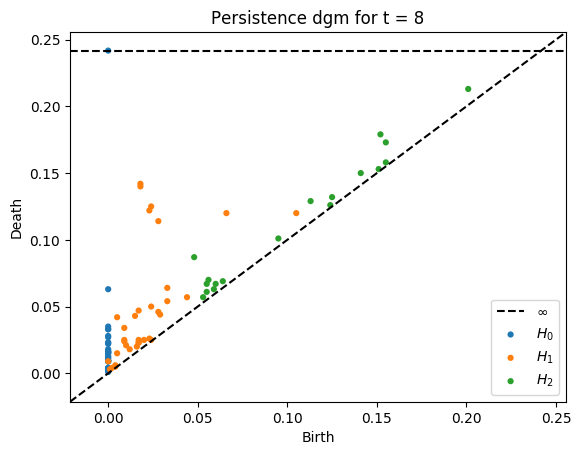

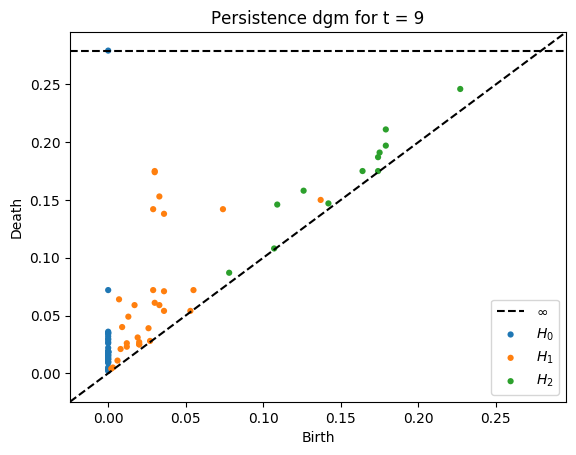

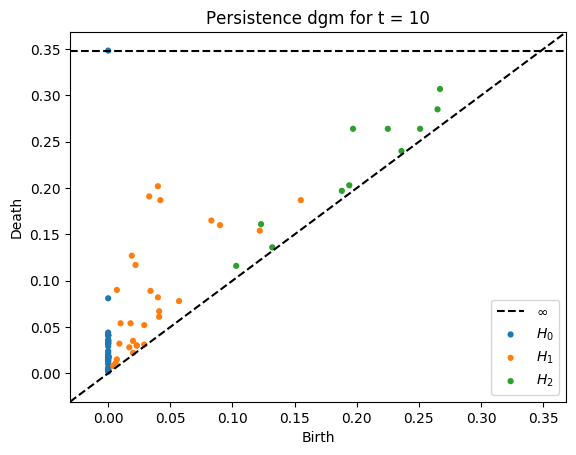

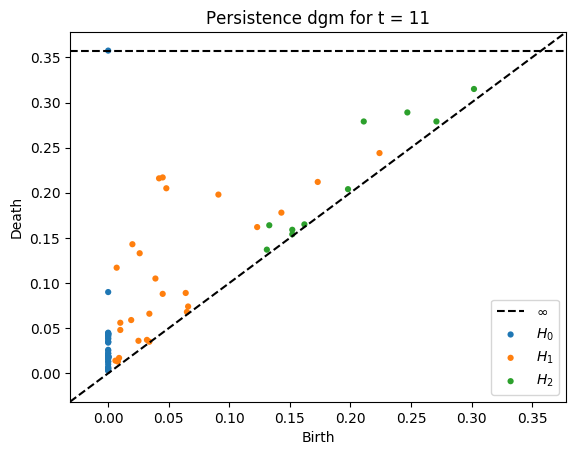

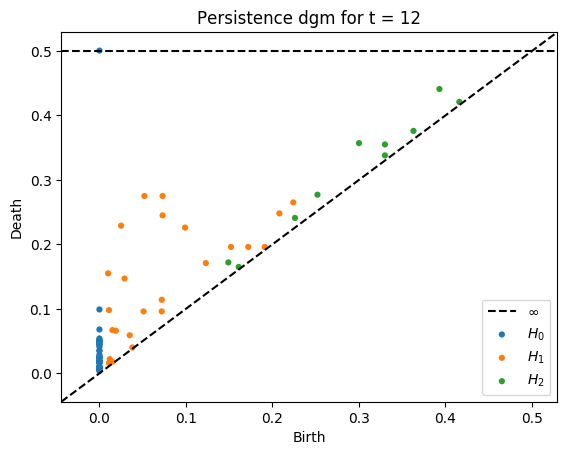

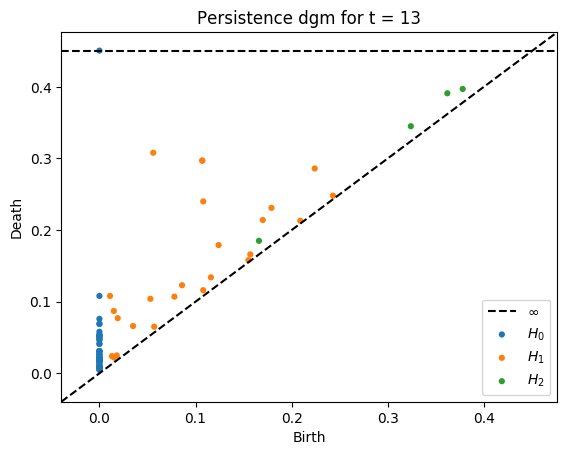

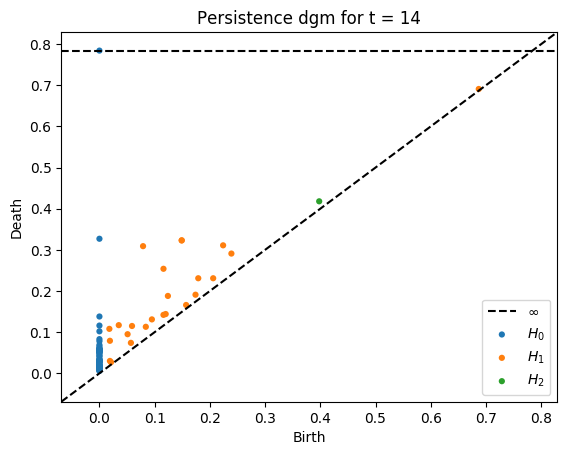

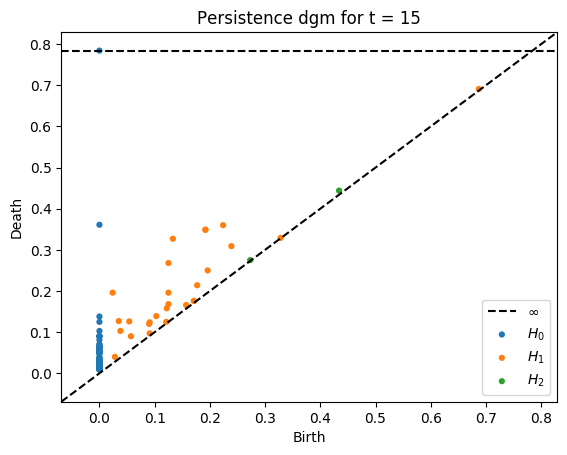

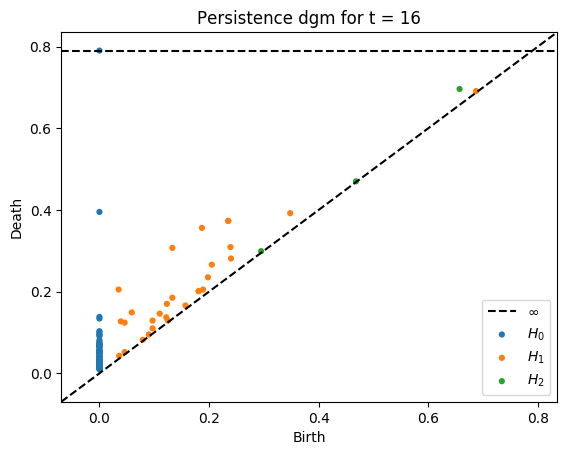

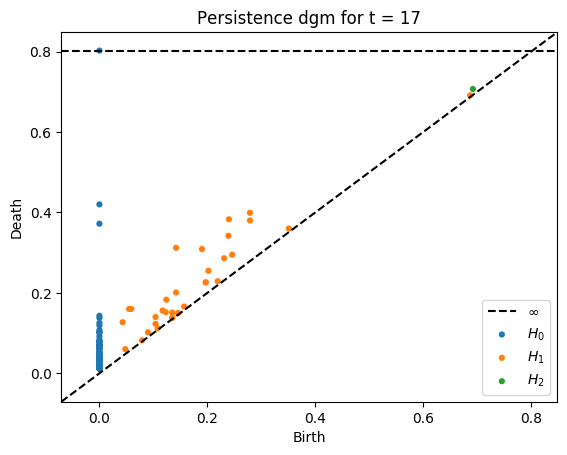

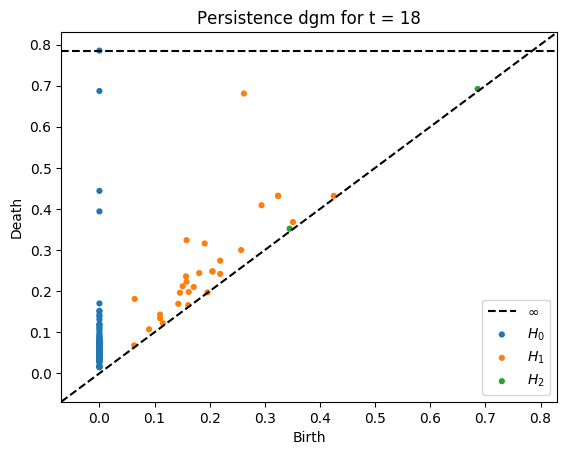

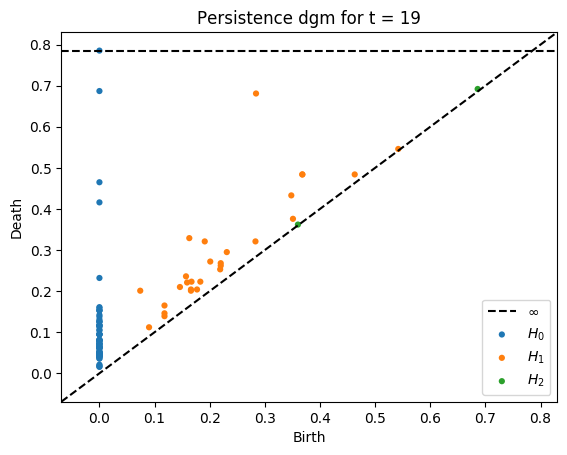

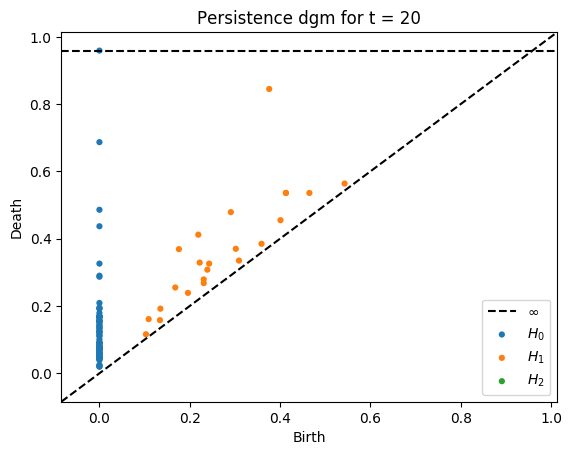

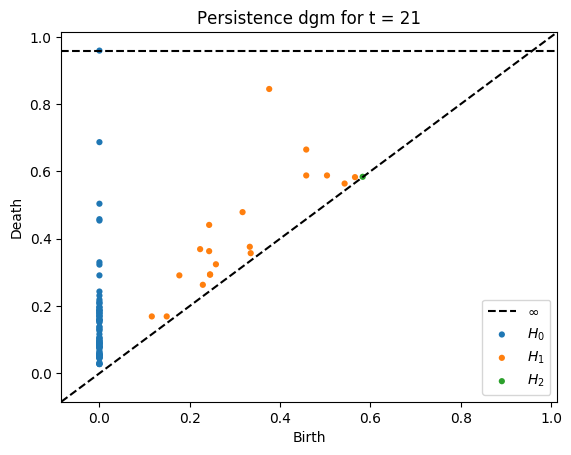

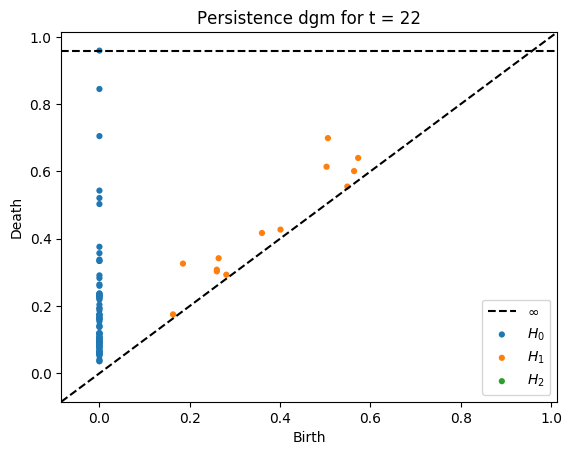

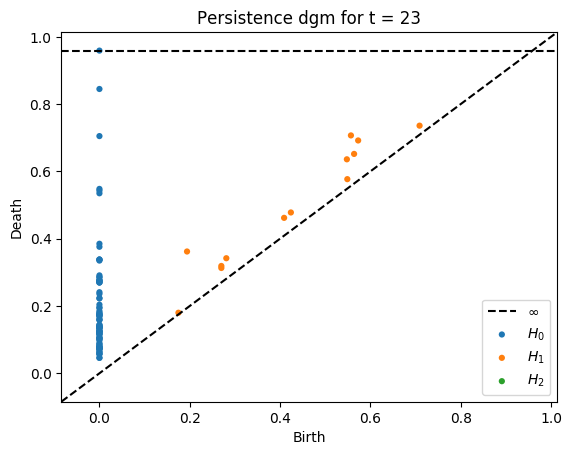

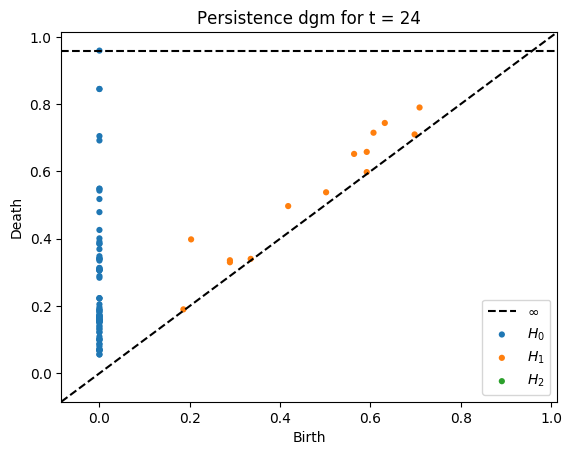

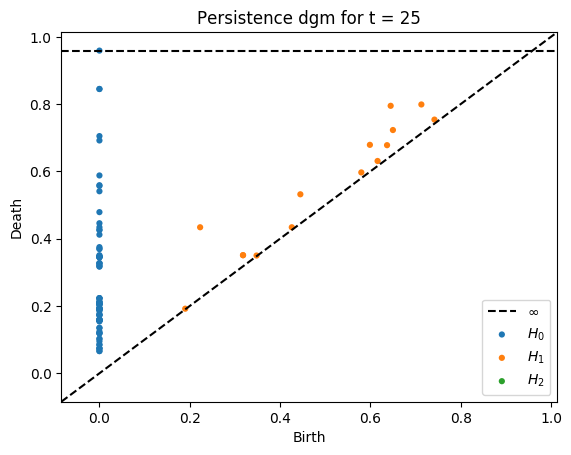

In [52]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)